# Face detection

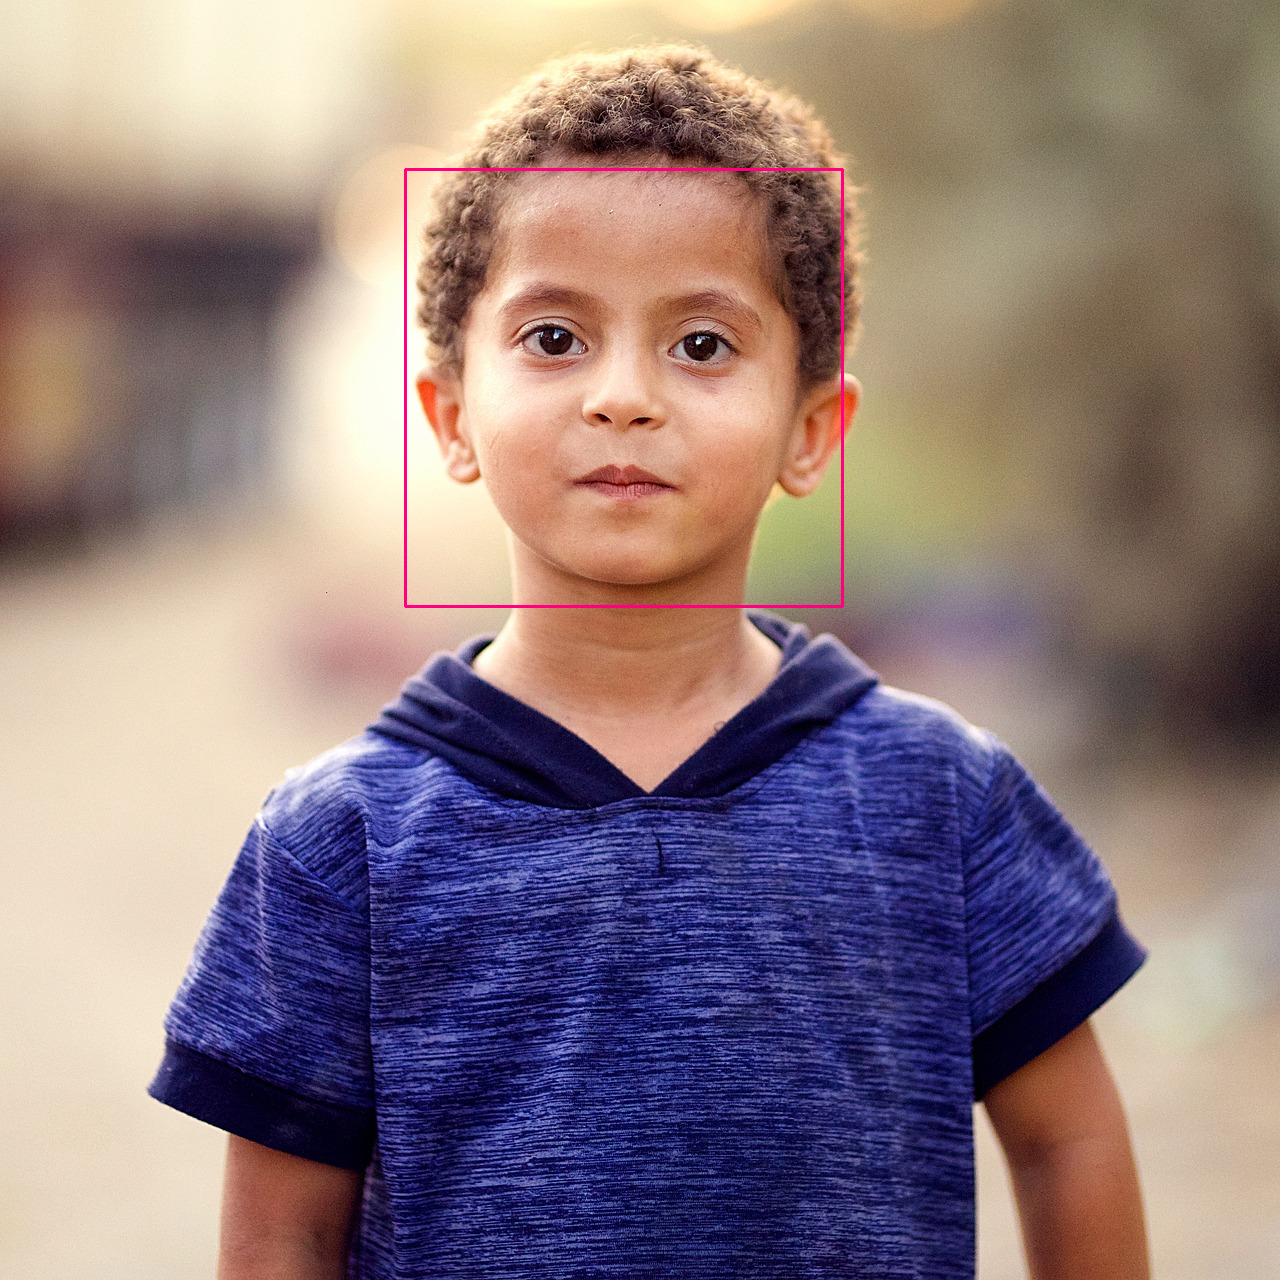

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(r'/content/haarcascade_frontalface_default.xml')

# Load the image
image = cv2.imread(r'/content/boy.jpg')

# Check if the image is loaded correctely
if image is None:
    print("Error: Image not fount or cannot be loaded!")
    exit()  # Exit if image is not found


# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect the face in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Check if face are detected
if len(faces) == 0:
    print("No faces found in the image.")
else:
    # Draw rectangle around the face
    for (x, y, w, h) in faces: # (x, y) is the top-left corner, and (w,h) is the width
        cv2.rectangle(image, (x, y), (x + w, y + h), (127, 0, 255), 2)

    # Display the output image
    cv2_imshow(image)

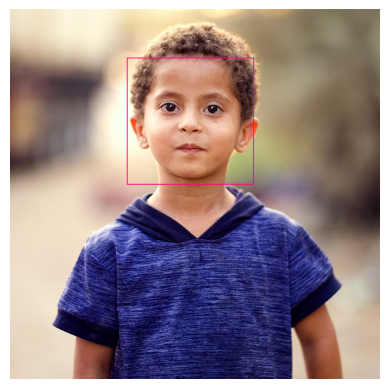

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

# Load the image
image = cv2.imread('/content/boy.jpg')

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found or cannot be loaded!")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Check if faces are detected
    if len(faces) == 0:
        print("No faces found in the image.")
    else:
        # Draw rectangles around detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x + w, y + h), (127, 0, 255), 2)

        # Convert BGR (OpenCV) image to RGB (matplotlib)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the output image in Colab
        plt.imshow(image_rgb)
        plt.axis("off")
        plt.show()


# Face and eye

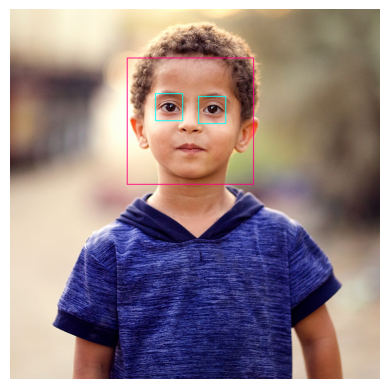

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the face and eye Haar cascade classifiers
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye_tree_eyeglasses.xml")

# Load the image
img = cv2.imread("/content/boy.jpg")

# Check if the image is loaded correctly
if img is None:
    print("Error: Image not found or cannot be loaded!")
else:
    # Convert image to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(faces) == 0:
        print("No Face Found")
    else:
        for (x, y, w, h) in faces:
            # Draw a rectangle around the face
            cv2.rectangle(img, (x, y), (x + w, y + h), (127, 0, 255), 2)

            # Region of interest (ROI) for face
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = img[y:y + h, x:x + w]

            # Detect eyes within the face region
            eyes = eye_classifier.detectMultiScale(roi_gray)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 255, 0), 2)

        # Convert BGR (OpenCV format) to RGB (matplotlib format)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display image inline in Colab
        plt.imshow(img_rgb)
        plt.axis("off")
        plt.show()


Face and Detection in real time code in google collab


<IPython.core.display.Javascript object>

Saved photo to photo.jpg


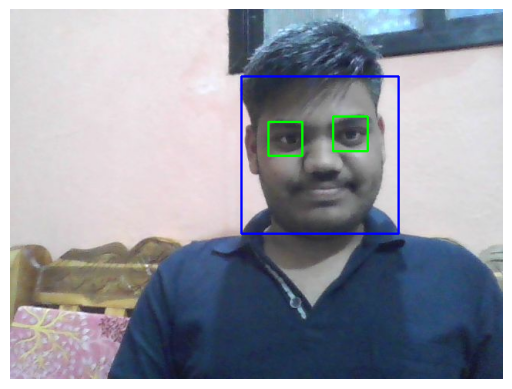

In [8]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ========== STEP 1: Webcam Capture ==========
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📷 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
      ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Take a photo using webcam
filename = take_photo()
print(f"Saved photo to {filename}")

# ========== STEP 2: Face + Eye Detection ==========
# Load Haar cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Load the captured image
img = cv2.imread(filename)

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

if len(faces) == 0:
    print("No face found.")
else:
    for (x, y, w, h) in faces:
        # Draw face rectangle
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detect eyes inside the face
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

# Convert BGR → RGB for display in Colab
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show result inline
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


Face and Detection in real time code in vs code

In [12]:
import cv2

# Load the Haar cascade files for face and eye detection
face_cascade = cv2.CascadeClassifier(r"/content/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"/content/haarcascade_eye.xml")


# Check if the cascade files were loaded properly
if face_cascade.empty():
    print("Error: Could not load face cascade classifier.")
    exit()

if eye_cascade.empty():
    print("Error: Could not load eye cascade classifier.")
    exit()

# Function to detect faces and eyes in the frame
def detect_faces_and_eyes(gray, frame):
    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Region of interest for detecting eyes within the face
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            # Draw rectangle around the eyes
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

    return frame


# Initialize webcam capture
video_capture = cv2.VideoCapture(0)

# Check if the webcam is accessible
if not video_capture.isOpened():
    print("Error: Could not access the webcam.")
    exit()

print("Webcam opened successfully. Starting face and eye detection...")

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    # If frame is not captured correctly, exit
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Convert the captured frame to grayscale for detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces and eyes in the grayscale image
    result_frame = detect_faces_and_eyes(gray, frame)

    # Display the resulting frame with detected faces and eyes
    cv2.imshow('Face and Eye Detection', result_frame)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Exiting...")
        break

# Release the webcam and close all OpenCV windows
video_capture.release()
cv2.destroyAllWindows()

Error: Could not load eye cascade classifier.
Error: Could not access the webcam.
Webcam opened successfully. Starting face and eye detection...
Error: Failed to capture frame.


# Real time multiple face and eye detection code in collab

📸 Capture 1/3 — Look at the camera and press '📷 Capture'


<IPython.core.display.Javascript object>

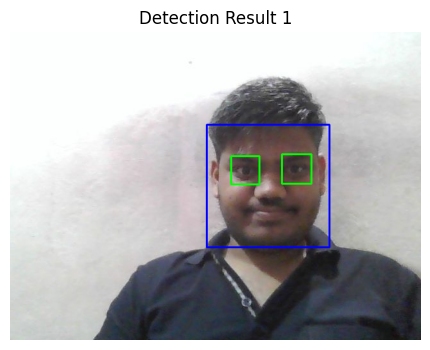

📸 Capture 2/3 — Look at the camera and press '📷 Capture'


<IPython.core.display.Javascript object>

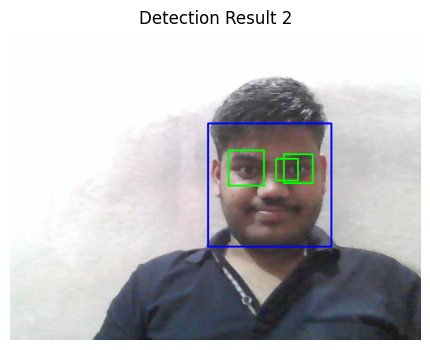

📸 Capture 3/3 — Look at the camera and press '📷 Capture'


<IPython.core.display.Javascript object>

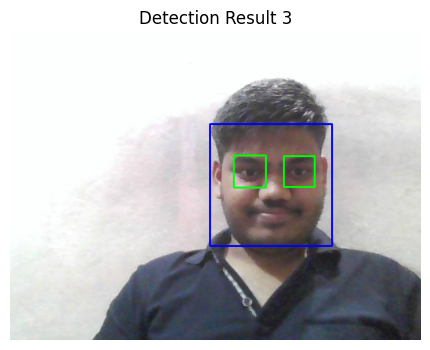

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ========== STEP 1: Webcam Capture ==========
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📷 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        let imgData;
        // Take multiple photos until user closes
        await new Promise((resolve) => {
          capture.onclick = () => {
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            imgData = canvas.toDataURL('image/jpeg', quality);
            resolve();
          };
        });

        stream.getVideoTracks()[0].stop();
        div.remove();
        return imgData;
      }
      ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# ========== STEP 2: Detection Function ==========
def detect_faces_and_eyes(img_path):
    # Load Haar cascade classifiers
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(faces) == 0:
        print("No face found.")
    else:
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]

            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb

# ========== STEP 3: Loop for Multiple Captures ==========
num_photos = 3  # Change this to take more/less photos

for i in range(num_photos):
    print(f"📸 Capture {i+1}/{num_photos} — Look at the camera and press '📷 Capture'")
    filename = f"photo_{i+1}.jpg"
    take_photo(filename=filename)
    result = detect_faces_and_eyes(filename)

    # Show result
    plt.figure(figsize=(6,4))
    plt.imshow(result)
    plt.axis("off")
    plt.title(f"Detection Result {i+1}")
    plt.show()


with download

📸 Capture 1/3 — Look at the camera and press '📷 Capture'


<IPython.core.display.Javascript object>

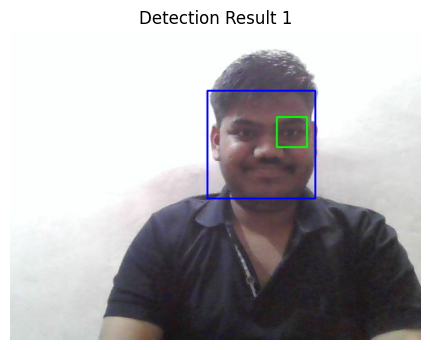

📸 Capture 2/3 — Look at the camera and press '📷 Capture'


<IPython.core.display.Javascript object>

No face found.


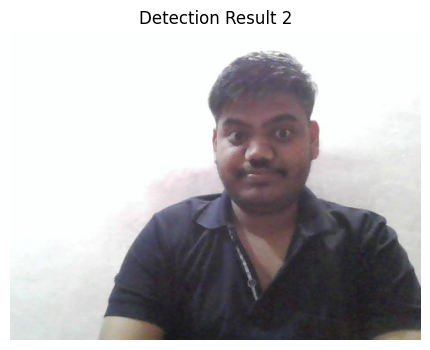

📸 Capture 3/3 — Look at the camera and press '📷 Capture'


<IPython.core.display.Javascript object>

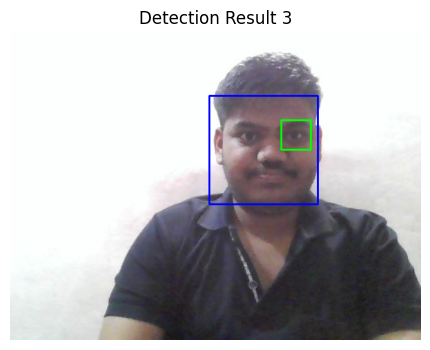

✅ All results saved and zipped as detected_results.zip


In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, zipfile

# ========== STEP 1: Webcam Capture ==========
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📷 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        let imgData;
        // Wait for Capture click
        await new Promise((resolve) => {
          capture.onclick = () => {
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            imgData = canvas.toDataURL('image/jpeg', quality);
            resolve();
          };
        });

        stream.getVideoTracks()[0].stop();
        div.remove();
        return imgData;
      }
      ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# ========== STEP 2: Detection Function ==========
def detect_faces_and_eyes(img_path, save_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(faces) == 0:
        print("No face found.")
    else:
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]

            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    # Save processed image
    cv2.imwrite(save_path, img)

    # Convert for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb

# ========== STEP 3: Multiple Captures ==========
os.makedirs("detected_photos", exist_ok=True)

num_photos = 3  # change number of captures
for i in range(num_photos):
    print(f"📸 Capture {i+1}/{num_photos} — Look at the camera and press '📷 Capture'")
    raw_file = f"photo_{i+1}.jpg"
    out_file = f"detected_photos/photo_{i+1}_detected.jpg"

    take_photo(filename=raw_file)
    result = detect_faces_and_eyes(raw_file, out_file)

    plt.figure(figsize=(6,4))
    plt.imshow(result)
    plt.axis("off")
    plt.title(f"Detection Result {i+1}")
    plt.show()

# ========== STEP 4: Zip All Results ==========
zip_filename = "detected_results.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in os.listdir("detected_photos"):
        zipf.write(os.path.join("detected_photos", file))

print(f"✅ All results saved and zipped as {zip_filename}")


In [ ]:
!pip install gradio opencv-python-headless matplotlib

In [9]:
!pip install gradio opencv-python-headless matplotlib

import cv2
import numpy as np
import gradio as gr

# =====================
# Detection Function
# =====================
def detect_faces_and_eyes(image):
    if image is None:
        return None

    # Convert PIL to OpenCV format
    img = np.array(image.convert("RGB"))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Load Haar cascades
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Draw rectangles for faces and eyes
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    # Convert back to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb


# =====================
# Gradio Frontend
# =====================
with gr.Blocks() as demo:
    gr.Markdown("## 👀 Face & Eye Detection App\nUpload an image or take a live webcam snapshot.")

    with gr.Row():
        inp = gr.Image(type="pil", label="Upload Image", sources=["upload"])
        cam = gr.Image(type="pil", label="Or Capture from Webcam", sources=["webcam"])

    run_btn = gr.Button("Run Detection", variant="primary")
    out_img = gr.Image(type="numpy", label="Detection Result")

    run_btn.click(fn=detect_faces_and_eyes, inputs=inp, outputs=out_img)
    run_btn.click(fn=detect_faces_and_eyes, inputs=cam, outputs=out_img)

# =====================
# Launch App
# =====================
demo.launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5f2d13b7438e98219a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://5f2d13b7438e98219a.gradio.live
